# Salary prediction based on job types

# Table of Contents

## Problem Definition

### 1) Importing Libraries  

### 2) Loading the Data

### 3) Cleaning and Exploring Data 

### 4) Data Visualization

### 5) Machine Learning model to predict salaries based on job types



# ---------------------------------------------------------------------------------------------------------

# Problem Definition : 
### Dataset consisting of training features, training target and test features are provided, aim is to perform exploratory data analysis and develop a machine learning model which will predict salaries based on job types.

## 1) Importing Libraries

In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


## 2) Loading the Data

In [45]:
#Load the data
# Read in files and print the information
train_feature_df = pd.read_csv(r'C:\Users\Ojas\Desktop\data\train_features.csv')
train_salaries_df = pd.read_csv(r'C:\Users\Ojas\Desktop\data\train_salaries.csv')
test_feature_df = pd.read_csv(r'C:\Users\Ojas\Desktop\data\test_features.csv')


## 3) Data Cleaning and Exploration

In [46]:
#Examine the data
train_feature_df.head(20)



,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16
5,JOB1362684407692,COMP15,MANAGER,DOCTORAL,COMPSCI,FINANCE,2,31
6,JOB1362684407693,COMP15,CFO,NONE,NONE,HEALTH,23,24
7,JOB1362684407694,COMP24,JUNIOR,BACHELORS,CHEMISTRY,EDUCATION,9,70
8,JOB1362684407695,COMP20,JANITOR,HIGH_SCHOOL,NONE,EDUCATION,1,54
9,JOB1362684407696,COMP41,VICE_PRESIDENT,BACHELORS,CHEMISTRY,AUTO,17,68


In [47]:
train_salaries_df.head(20)

,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163
5,JOB1362684407692,113
6,JOB1362684407693,178
7,JOB1362684407694,73
8,JOB1362684407695,31
9,JOB1362684407696,104


In [48]:
test_feature_df.head(20)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362685407687,COMP33,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
1,JOB1362685407688,COMP13,JUNIOR,NONE,NONE,AUTO,20,47
2,JOB1362685407689,COMP10,CTO,MASTERS,BIOLOGY,HEALTH,17,9
3,JOB1362685407690,COMP21,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96
4,JOB1362685407691,COMP36,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44
5,JOB1362685407692,COMP40,CTO,MASTERS,COMPSCI,FINANCE,6,23
6,JOB1362685407693,COMP32,SENIOR,MASTERS,COMPSCI,SERVICE,6,32
7,JOB1362685407694,COMP11,CEO,BACHELORS,BIOLOGY,SERVICE,9,73
8,JOB1362685407695,COMP39,MANAGER,DOCTORAL,PHYSICS,HEALTH,6,78
9,JOB1362685407696,COMP22,VICE_PRESIDENT,NONE,NONE,AUTO,23,97


### ---Using .info() to observe length and dtypes---

In [49]:

train_feature_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
jobId                  1000000 non-null object
companyId              1000000 non-null object
jobType                1000000 non-null object
degree                 1000000 non-null object
major                  1000000 non-null object
industry               1000000 non-null object
yearsExperience        1000000 non-null int64
milesFromMetropolis    1000000 non-null int64
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


In [50]:
train_salaries_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
jobId     1000000 non-null object
salary    1000000 non-null int64
dtypes: int64(1), object(1)
memory usage: 15.3+ MB


In [51]:
test_feature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
jobId                  1000000 non-null object
companyId              1000000 non-null object
jobType                1000000 non-null object
degree                 1000000 non-null object
major                  1000000 non-null object
industry               1000000 non-null object
yearsExperience        1000000 non-null int64
milesFromMetropolis    1000000 non-null int64
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


### ---To check for any duplicates---

In [52]:
#Check for duplicates
train_feature_df.duplicated().sum()



0

In [53]:
train_salaries_df.duplicated().sum()


0

In [54]:
test_feature_df.duplicated().sum()

0

### ---To check for any null values---

In [55]:
train_feature_df.isnull().sum()

jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
dtype: int64

In [56]:
train_salaries_df.isnull().sum()

jobId     0
salary    0
dtype: int64

In [57]:
test_feature_df.isnull().sum()

jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
dtype: int64

### ---To recognize numerical and categorical variables---

In [58]:
#Identify numerical and categorical variables
train_feature_df.columns
num_cols = ['yearsExperience', 'milesFromMetropolis']
cat_cols = ['companyId', 'jobType', 'degree', 'major', 'industry']
target_cols = 'salary'            


### ---Distinct summary of Numerical and Categorical Variables---

In [59]:
#Summarize numerical and categorical variables separately
train_feature_df.describe(include = [np.number])
train_feature_df.describe(include = ['O'])


,jobId,companyId,jobType,degree,major,industry
count,1000000,1000000,1000000,1000000,1000000,1000000
unique,1000000,63,8,5,9,7
top,JOB1362684949634,COMP39,SENIOR,HIGH_SCHOOL,NONE,WEB
freq,1,16193,125886,236976,532355,143206


### ---Combine salary and features into a single dataframe---

In [60]:
train_df = pd.merge(train_feature_df, train_salaries_df, on='jobId')




In [61]:
train_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
jobId                  1000000 non-null object
companyId              1000000 non-null object
jobType                1000000 non-null object
degree                 1000000 non-null object
major                  1000000 non-null object
industry               1000000 non-null object
yearsExperience        1000000 non-null int64
milesFromMetropolis    1000000 non-null int64
salary                 1000000 non-null int64
dtypes: int64(3), object(6)
memory usage: 76.3+ MB


In [62]:
train_df.head(10)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163
5,JOB1362684407692,COMP15,MANAGER,DOCTORAL,COMPSCI,FINANCE,2,31,113
6,JOB1362684407693,COMP15,CFO,NONE,NONE,HEALTH,23,24,178
7,JOB1362684407694,COMP24,JUNIOR,BACHELORS,CHEMISTRY,EDUCATION,9,70,73
8,JOB1362684407695,COMP20,JANITOR,HIGH_SCHOOL,NONE,EDUCATION,1,54,31
9,JOB1362684407696,COMP41,VICE_PRESIDENT,BACHELORS,CHEMISTRY,AUTO,17,68,104


### ---Visualizing the target variable i.e. salary---

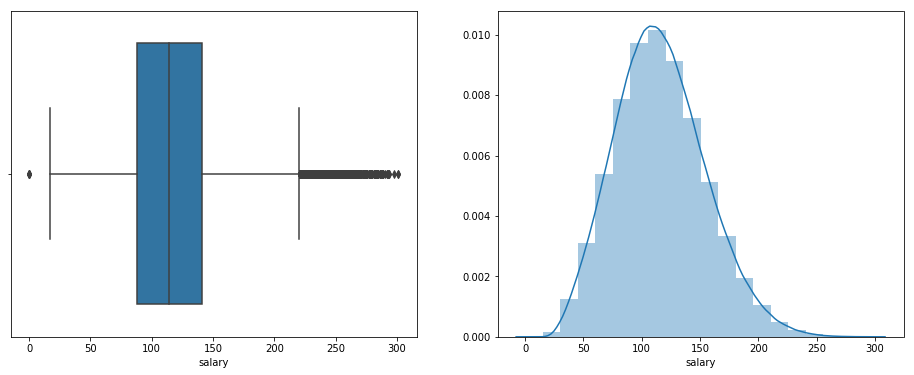

In [63]:

plt.figure(figsize = (16, 6))
plt.subplot(1,2,1)
sns.boxplot(train_df.salary)
plt.subplot(1,2,2)
sns.distplot(train_df.salary, bins=20)
plt.show()


### ---Identification of outliers using Inter Quartile Range (IQR)---

In [64]:
#Use IQR rule to identify potential outliers
stat = train_df.salary.describe()
print(stat)
IQR = stat['75%'] - stat['25%']
upper = stat['75%'] + 1.5 * IQR
lower = stat['25%'] - 1.5 * IQR
print('The upper and lower bounds for suspected outliers are {} and {}.'.format(upper, lower))


count    1000000.000000
mean         116.061818
std           38.717936
min            0.000000
25%           88.000000
50%          114.000000
75%          141.000000
max          301.000000
Name: salary, dtype: float64
The upper and lower bounds for suspected outliers are 220.5 and 8.5.


In [65]:

#check potential outlier below lower bound
train_df[train_df.salary < 8.5]


,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
30559,JOB1362684438246,COMP44,JUNIOR,DOCTORAL,MATH,AUTO,11,7,0
495984,JOB1362684903671,COMP34,JUNIOR,NONE,NONE,OIL,1,25,0
652076,JOB1362685059763,COMP25,CTO,HIGH_SCHOOL,NONE,AUTO,6,60,0
816129,JOB1362685223816,COMP42,MANAGER,DOCTORAL,ENGINEERING,FINANCE,18,6,0
828156,JOB1362685235843,COMP40,VICE_PRESIDENT,MASTERS,ENGINEERING,WEB,3,29,0


In [66]:
#check potential outlier above upper bound
train_df.loc[train_df.salary > 222.5, 'jobType'].value_counts()


CEO               2893
CFO               1308
CTO               1298
VICE_PRESIDENT     520
MANAGER            188
SENIOR              50
JUNIOR              16
Name: jobType, dtype: int64

In [67]:
# Check most suspicious potential outliers above upper bound
train_df[(train_df.salary > 222.5) & (train_df.jobType == 'JUNIOR')]


,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
1222,JOB1362684408909,COMP40,JUNIOR,MASTERS,COMPSCI,OIL,24,5,225
27710,JOB1362684435397,COMP21,JUNIOR,DOCTORAL,ENGINEERING,OIL,24,3,246
31355,JOB1362684439042,COMP45,JUNIOR,DOCTORAL,COMPSCI,FINANCE,24,0,225
100042,JOB1362684507729,COMP17,JUNIOR,DOCTORAL,BUSINESS,FINANCE,23,8,248
160333,JOB1362684568020,COMP18,JUNIOR,DOCTORAL,BUSINESS,FINANCE,22,3,223
303778,JOB1362684711465,COMP51,JUNIOR,MASTERS,ENGINEERING,WEB,24,2,226
348354,JOB1362684756041,COMP56,JUNIOR,DOCTORAL,ENGINEERING,OIL,23,25,226
500739,JOB1362684908426,COMP40,JUNIOR,DOCTORAL,ENGINEERING,OIL,21,0,227
627534,JOB1362685035221,COMP5,JUNIOR,DOCTORAL,ENGINEERING,OIL,24,29,230
645555,JOB1362685053242,COMP36,JUNIOR,DOCTORAL,BUSINESS,FINANCE,24,1,225


In [68]:
### Entries with zero salary aren't any volunteer jobs. We are confident that it's an instance of missing information or error during data entry process. Therefore, these entries should be eliminated from the training dataset.

### The high-salary potential outliers appear to be valid and legitimated data. Many roles are C-level executive roles and the junior positions are in industries that are well known for high salaries such as oil and finance. Thus, we determine these entries to be correct and won't remove them from the dataset.


### ---Eliminate data with zero salaries---

In [69]:


train_df = train_df[train_df.salary > 8.5]

## 4) Data Visualization

### Defining function named plot_attribute so that we can compare the target variable with other features and observe any relation between them, as well as it  can be used iteratively. Defining function saves lot of time, memory and it automizes the process.

In [70]:

def plot_attribute(df, column):
    '''
    Make plot for each attribute
    left, the distribution of samples on the attribute
    right, the dependance of salary on the attribute
    '''
    plt.figure(figsize = (14, 6))
    plt.subplot(1, 2, 1)
    if df[column].dtype == 'int64':
        df[column].value_counts().sort_index().plot()
    else:
        #change the categorical variable to category type and order their level by the mean salary
        #in each category
        mean = df.groupby(column)['salary'].mean()
        df[column] = df[column].astype('category')
        levels = mean.sort_values().index.tolist()
        df[column].cat.reorder_categories(levels, inplace=True)
        df[column].value_counts().plot()
    plt.xticks(rotation=45)
    plt.xlabel(column)
    plt.ylabel('Counts')
    plt.subplot(1, 2, 2)

    if df[column].dtype == 'int64' or column == 'companyId':
        #plot the mean salary for each category and fill between the (mean - std, mean + std)
        mean = df.groupby(column)['salary'].mean()
        std = df.groupby(column)['salary'].std()
        mean.plot()
        plt.fill_between(range(len(std.index)), mean.values-std.values, mean.values + std.values, \
                         alpha = 0.1)
    else:
        sns.boxplot(x = column, y = 'salary', data=df)
    
    plt.xticks(rotation=45)
    plt.ylabel('Salaries')
    plt.show()



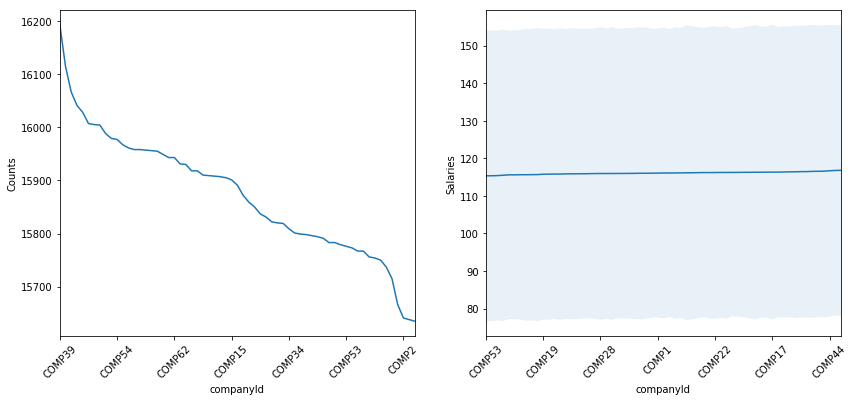

In [71]:
plot_attribute(train_df, 'companyId')





### There is very weak relation between salary and companies.

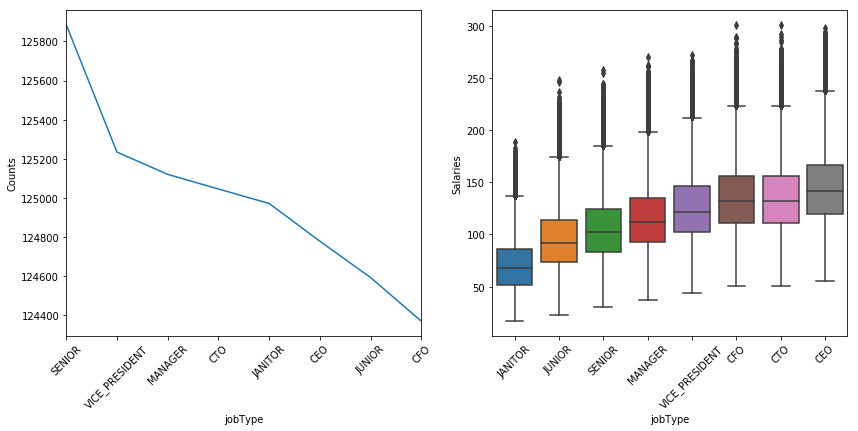

In [72]:
plot_attribute(train_df, 'jobType')




### There is a strong positive correlation between job type and salary.

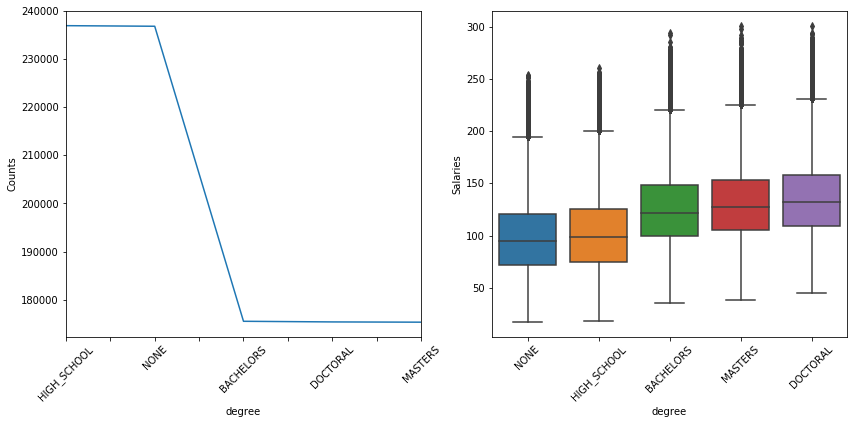

In [73]:
plot_attribute(train_df, 'degree')




### Strong correspondence between degrees and salaries. The more advanced the degree, higher the salary.

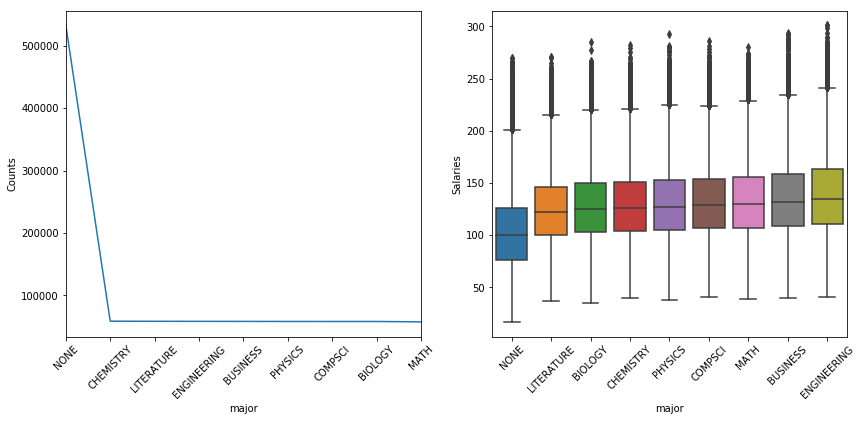

In [74]:
plot_attribute(train_df, 'major')




### Majors of engineering, business and math generally have higher salaries.

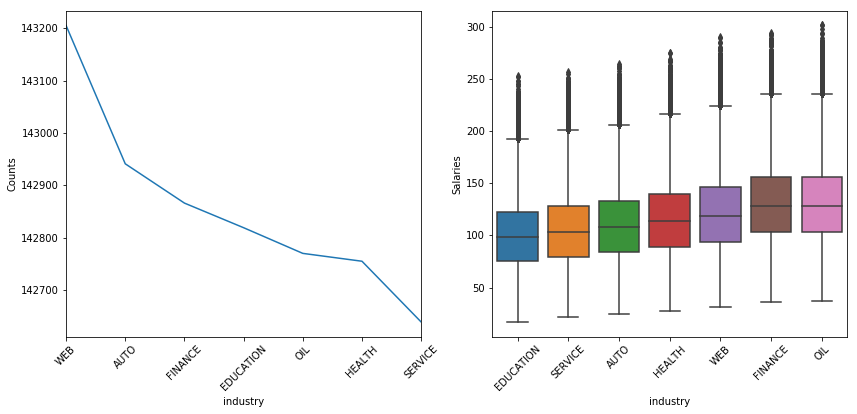

In [75]:
plot_attribute(train_df, 'industry')




### Industries of  oil, finance and web industries generally pay higher salaries

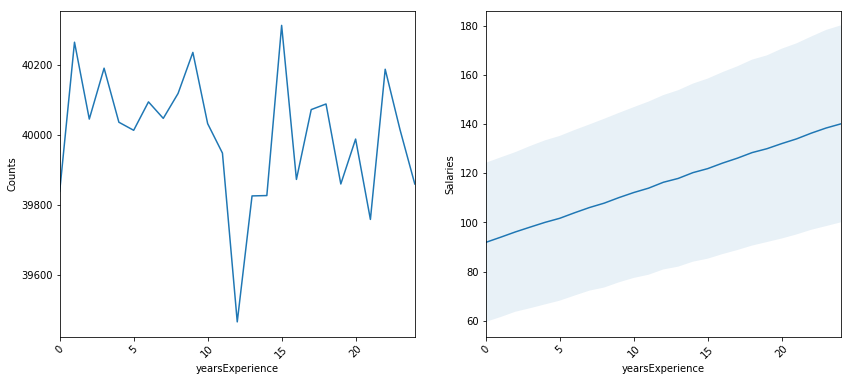

In [76]:
plot_attribute(train_df, 'yearsExperience')




### In general, there is a strong correlation between salary and years of experience. Higher the years of experience, higher the salaries.

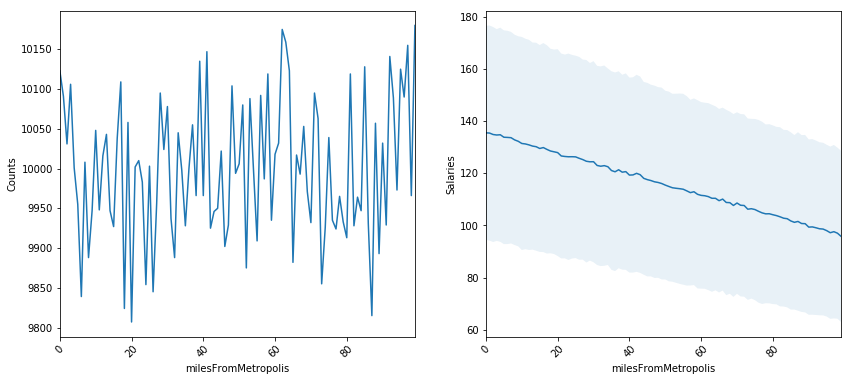

In [77]:
plot_attribute(train_df, 'milesFromMetropolis')


### Distance to metropolis and salaries are inversely proportional. Higher the distance, lower the salaries.

### ---Encoding Categorical Variables for construting Heatmap---

In [78]:
def label_encoding(df, column):
    #encode the categories using average salary for each category to replace label
    cat_dict ={}
    cats = df[column].cat.categories.tolist()
    for cat in cats:
        cat_dict[cat] = train_df[train_df[column] == cat]['salary'].mean()   
    df[column] = df[column].map(cat_dict)
for column in train_df.columns:
    if train_df[column].dtype.name == "category":
        label_encoding(train_df, column)


### ---Correlations between selected attributes and response using Heatmap---

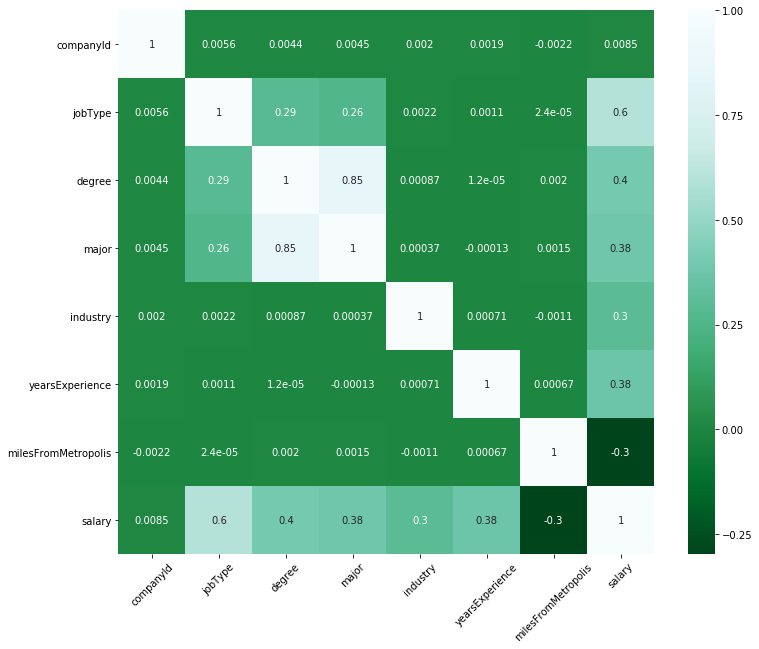

In [79]:

# jobId is discarded because it is unique for individual
fig = plt.figure(figsize=(12, 10))
features = ['companyId', 'jobType', 'degree', 'major', 'industry', 'yearsExperience', 'milesFromMetropolis']
sns.heatmap(train_df[features + ['salary']].corr(), cmap='BuGn_r', annot=True)
plt.xticks(rotation=45)
plt.show()

### From the above heatmap ,we conclude that jobType is very highly correlated with salary, followed by degree, major, and yearsExperience.
### From the attributes, we observe that there is strong correlation between major and degree,jobType has medium degree of correlation with both degree and major.

## 5) Machine Learning model to predict salaries based on job types

### ---Importing ML Libraries---

In [80]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

### ---Creating Functions for our convenience--- 

In [81]:
def one_hot_encode_feature_df(df, cat_vars=None, num_vars=None):
    '''performs one-hot encoding on all categorical variables and combines result with continous variables'''
    cat_df = pd.get_dummies(df[cat_vars])
    num_df = df[num_vars].apply(pd.to_numeric)
    return pd.concat([cat_df, num_df], axis=1)#,ignore_index=False)

def train_model(model, feature_df, target_df, num_procs, mean_mse, cv_std):
    neg_mse = cross_val_score(model, feature_df, target_df, cv=2, n_jobs=num_procs, scoring='neg_mean_squared_error')
    mean_mse[model] = -1.0*np.mean(neg_mse)
    cv_std[model] = np.std(neg_mse)
    
def print_summary(model, mean_mse, cv_std):
    print('\nModel:\n', model)
    print('Average MSE:\n', mean_mse[model])
    print('Standard deviation during CV:\n', cv_std[model])
    
def save_results(model, mean_mse, predictions, feature_importances):
    '''saves model, model summary, feature importances, and predictions'''
    with open('model.txt', 'w') as file:
        file.write(str(model))
    feature_importances.to_csv('feature_importances.csv') 
    np.savetxt('predictions.csv', predictions, delimiter=',')

### ---Encoding Categorical Features--- 

In [82]:
#Encoding categorical data and get final feature dfs
print("Encoding data")
X_train = one_hot_encode_feature_df(train_feature_df, cat_vars=cat_cols, num_vars=num_cols)
X_test = one_hot_encode_feature_df(test_feature_df, cat_vars=cat_cols, num_vars=num_cols)

Encoding data


In [83]:
Y_train = train_salaries_df['salary']
X_train.shape, Y_train.shape, X_test.shape

((1000000, 94), (1000000,), (1000000, 94))

### --- Initializing model, dictionaries and list--- 

In [84]:
 #Initializing model, list and dicts
models = []
mean_mse = {}
cv_std = {}
res = {}

   #define number of processes to run in parallel
num_procs = 2

   #shared model paramaters
verbose_lvl = 5

### ---Creating models and manually tuning the hyperparameters--- 

In [85]:
lr = LinearRegression()
lr_std_pca = make_pipeline(StandardScaler(), PCA(), LinearRegression())
rf = RandomForestRegressor(n_estimators=60, max_depth=25,n_jobs=num_procs, min_samples_split=60, \
                           max_features=30, verbose=verbose_lvl)
gbm = GradientBoostingRegressor(n_estimators=40, max_depth=5, loss='ls', verbose=verbose_lvl)
                      
models.extend([lr, lr_std_pca, rf, gbm])

### ---Cross-validating the models---

#### Here, we are using Mean squared error as metric for evaluating the machine learning models.

In [86]:
 #parallel cross-validate models, using MSE as evaluation metric, and print summaries
print("Beginning cross validation")
for model in models:
    train_model(model, X_train, Y_train, num_procs, mean_mse, cv_std)
    print_summary(model, mean_mse, cv_std)
    
   #choose model with lowest mse
model = min(mean_mse, key=mean_mse.get)
print('\nPredictions calculated using model with lowest MSE:')
print(model)

Beginning cross validation

Model:
 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
Average MSE:
 384.5751751597728
Standard deviation during CV:
 1.3571293137249825

Model:
 Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])
Average MSE:
 384.5755621676682
Standard deviation during CV:
 1.3623557757292986

Model:
 RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=25,
           max_features=30, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=60, min_weight_fraction_leaf=0.0,
           n_estimators=60, n_jobs=2, oob_score=False, random_state=None,


### --- Predictions on test dataset ---

In [87]:
   #train model on entire dataset
model.fit(X_train, Y_train)

   #create predictions based on test data
predictions = model.predict(X_test)

  

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 60building tree 2 of 60

building tree 3 of 60building tree 4 of 60

building tree 5 of 60
building tree 6 of 60
building tree 7 of 60
building tree 8 of 60
building tree 9 of 60
building tree 10 of 60
building tree 11 of 60
building tree 12 of 60
building tree 13 of 60
building tree 14 of 60
building tree 15 of 60
building tree 16 of 60


[Parallel(n_jobs=2)]: Done  14 tasks      | elapsed:   46.2s


building tree 17 of 60
building tree 18 of 60
building tree 19 of 60
building tree 20 of 60
building tree 21 of 60
building tree 22 of 60
building tree 23 of 60
building tree 24 of 60
building tree 25 of 60
building tree 26 of 60
building tree 27 of 60
building tree 28 of 60
building tree 29 of 60
building tree 30 of 60
building tree 31 of 60
building tree 32 of 60
building tree 33 of 60
building tree 34 of 60
building tree 35 of 60
building tree 36 of 60
building tree 37 of 60
building tree 38 of 60
building tree 39 of 60
building tree 40 of 60
building tree 41 of 60
building tree 42 of 60
building tree 43 of 60
building tree 44 of 60
building tree 45 of 60
building tree 46 of 60
building tree 47 of 60
building tree 48 of 60
building tree 49 of 60
building tree 50 of 60
building tree 51 of 60
building tree 52 of 60
building tree 53 of 60
building tree 54 of 60
building tree 55 of 60
building tree 56 of 60
building tree 57 of 60
building tree 58 of 60
building tree 59 of 60
building tr

[Parallel(n_jobs=2)]: Done  60 out of  60 | elapsed:  3.3min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  14 tasks      | elapsed:    2.5s
[Parallel(n_jobs=2)]: Done  60 out of  60 | elapsed:   11.3s finished


### --- Storing Feature Importances ---

In [88]:
 #store feature importances
if hasattr(model, 'feature_importances_'):
    importances = model.feature_importances_
else:
      #linear models don't have feature_importances_
    importances = [0]*len(X_train.columns)
    
feature_importances = pd.DataFrame({'feature':X_train.columns, 'importance':importances})
feature_importances.sort_values(by='importance', ascending=False, inplace=True)
    
   #set index to 'feature'
feature_importances.set_index('feature', inplace=True, drop=True)

   #save results
save_results(model, mean_mse[model], predictions, feature_importances)

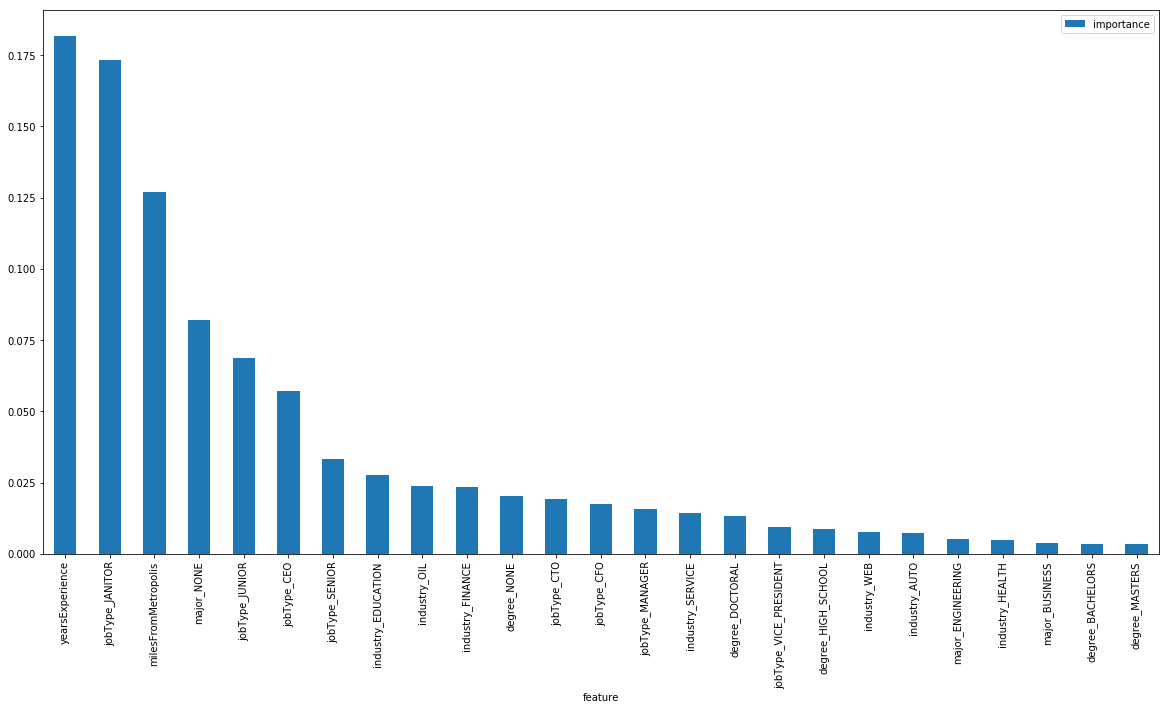

'cat' is not recognized as an internal or external command,
operable program or batch file.
'head' is not recognized as an internal or external command,
operable program or batch file.
'head' is not recognized as an internal or external command,
operable program or batch file.


In [89]:
feature_importances[0:25].plot.bar(figsize=(20,10))
plt.show()

!cat model.txt

!head feature_importances.csv

!head predictions.csv

### From the above visualization, we conclude that the top three factors for determining salary of the candidate are number of years of experience, type of jobe, and distance from metropolis.